# Created a Hugging Face `spaces`

While I was experimenting with a python lib named `Gradio` which provides user a web-interface to showcase there trained model.
So, I made a `Huggingface spaces` on the above bonus assignment,

i.e to *`predict the Codeforces ranking with the help of users Codechef ranking or visa versa`*.

by the way, `CodeChef` and `Codeforces` are popular online platforms that provide competitive programming(CP) contests and resources for programmers to improve their coding skills.

and,

`Hugging Face` is a company and an open-source community that specializes in developing natural language processing (NLP) and machine learning tools.

`link:` https://huggingface.co/spaces/Vishalpainjane/CC_CF_rating_predictor

.

### Import all required libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load data

In [25]:
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
...,...,...,...,...,...
11270,TeaPot,teapot,2677.0,NaN,NaN
11271,luosiyuan,tianbu,2882.0,NaN,NaN
11272,dorijanko,dorijanlendvaj,3120.0,NaN,NaN
11273,gamegame,gamegame,3218.0,NaN,NaN


#### Converting datatype to `srt`

In [26]:
df['cf_rating']=df['cf_rating'].astype(str)
df['cc_rating']=df['cc_rating'].astype(str)
df['cf_username']=df['cf_username'].astype(str)
df['cc_username']=df['cc_username'].astype(str)
df['ss_username']=df['ss_username'].astype(str)

#### Classifying different dataframes

In [27]:
only_cc = df[(df['cf_username'] == "nan")]
only_cf = df[(df['cc_username'] == "nan")]
both_cc_cf = df[(df['cf_username'] != "nan") & (df['cf_rating'] != "nan") & (df['cc_username'] != "nan") & (df['cc_rating'] != "nan")]

### Droping unwanted columns  

In [28]:
both_cc_cf.drop(columns=['ss_username','cf_username','cc_username'],inplace=True)
both_cc_cf.head()

,cf_rating,cc_rating
0,3449.0,3007.0
4,1703.0,2673.0
5,2202.0,2628.0
6,2262.0,2628.0
7,2023.0,2565.0


#### Fearure Standardizing

In [29]:
X=both_cc_cf['cc_rating'].values.reshape(-1,1).astype(float)
Y=both_cc_cf['cf_rating'].values.reshape(-1,1).astype(float)
X

array([[3007.],
       [2673.],
       [2628.],
       ...,
       [ 518.],
       [ 460.],
       [ 277.]])

### plot of `test data points` between CC & CF

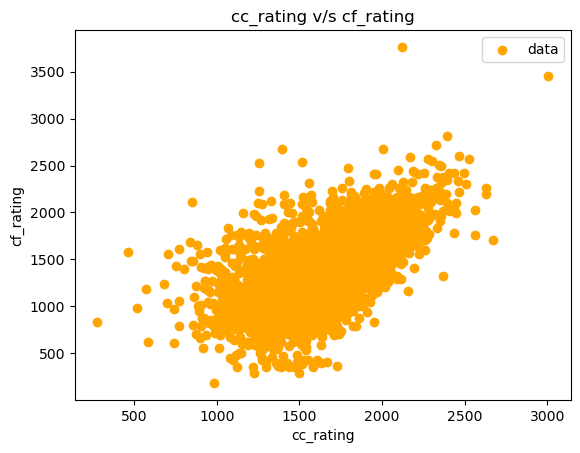

In [31]:
plt.scatter(X, Y, color='orange', label='data')
plt.legend()
plt.xlabel("cc_rating")
plt.ylabel("cf_rating")
plt.title('cc_rating v/s cf_rating')

plt.show()

### Linear Regression (Analytical Solution)

In [12]:
def linear_regression(X, y):
    #calculating mean
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    
    n = 0
    d = 0
    for i in range(len(X)):
        n += (X[i] - mean_x) * (y[i] - mean_y)
        d += (X[i] - mean_x) ** 2
    #calculating weights and bias
    w = n/d
    b = mean_y-(w * mean_x)
  
    return (b, w)

In [13]:
b,w = linear_regression(X,Y)

### `Intercept(b)` & `Coefficient(w)` through Analytical Solution method

In [14]:
print(f"Intercept: {b[0]:0.5f}")
print(f"Coefficients: {w[0]:0.5f}")

Intercept: -32.62927
Coefficients: 0.83156


finding predictions of rating 

In [15]:
Y_pred = np.dot(X,w) + b
print(Y_pred)

[2467.87783605 2190.13610949 2152.71581699 ...  398.11987972  349.88928049
  197.71342432]


### plot of `predicted line` & `test data points`

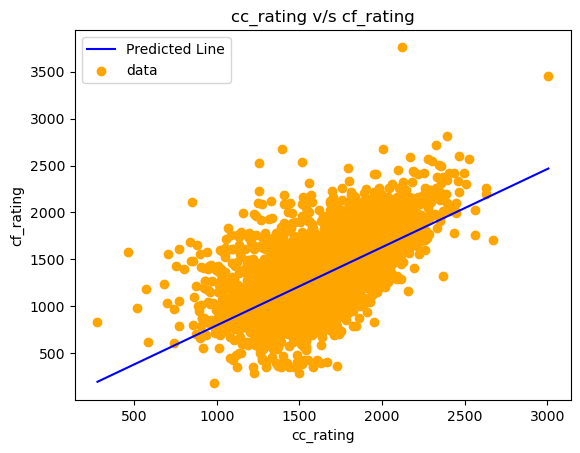

In [32]:
#pred line
plt.plot(X, Y_pred, color = "blue", label='Predicted Line')

#test data points
plt.scatter(X, Y, color='orange', label='data')
plt.legend()
plt.xlabel("cc_rating")
plt.ylabel("cf_rating")
plt.title('cc_rating v/s cf_rating')

plt.show()

In [17]:
X_cf=only_cf['cf_rating'].values.reshape(-1,1).astype(float)
X_cc=only_cc['cc_rating'].values.reshape(-1,1).astype(float)

In [18]:
y_pred_cc = np.dot(X_cf, w) + b

In [20]:
for z in range(700,2100,100):
    print(f'codechef {z} , codeforces {(w[0] * z + b[0]):0.4f}')

codechef 700 , codeforces 549.4642
codechef 800 , codeforces 632.6204
codechef 900 , codeforces 715.7766
codechef 1000 , codeforces 798.9328
codechef 1100 , codeforces 882.0890
codechef 1200 , codeforces 965.2452
codechef 1300 , codeforces 1048.4014
codechef 1400 , codeforces 1131.5576
codechef 1500 , codeforces 1214.7138
codechef 1600 , codeforces 1297.8700
codechef 1700 , codeforces 1381.0262
codechef 1800 , codeforces 1464.1824
codechef 1900 , codeforces 1547.3386
codechef 2000 , codeforces 1630.4948
